<a href="https://colab.research.google.com/github/yeshwanthreddyp/BI-GRU-ATTENTION/blob/main/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1
!pip install pydub

import os
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

from pydub import AudioSegment
from IPython.display import Audio

import librosa
import librosa.display
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# creating the dataframe which has path to wav file and it's label
#2

label = []
path = []

root = "/content/drive/MyDrive/Colab Notebooks/whole_dataset/train_val/train_data"
for species in os.listdir(root):
    species_folder = root + '/' + species
    for audio in os.listdir(species_folder):
        audio_path = species_folder + '/' + audio
        path.append(audio_path)
        label.append(species)

df_train = pd.DataFrame({'path': path,
                         'class_name': label})
print(df_train.shape)
df_train.sample(5)

(974, 2)


,path,class_name
186,/content/drive/MyDrive/Colab Notebooks/whole_d...,owl
0,/content/drive/MyDrive/Colab Notebooks/whole_d...,peafowl
498,/content/drive/MyDrive/Colab Notebooks/whole_d...,goaway
35,/content/drive/MyDrive/Colab Notebooks/whole_d...,peafowl
715,/content/drive/MyDrive/Colab Notebooks/whole_d...,Asiankoel


In [5]:
# adding numerical class labels to each audio files
#3

cls_label = {'Asiankoel' : 0, 'bluejay': 1, 'crow': 2, 'duck': 3, 'goaway': 4, 'lapwing': 5, 'owl': 6,
       'peafowl' : 7, 'sparrow':8, 'woodpeewe':9}

def name_to_label(x):
  cls_name = x['class_name']
  return cls_label[cls_name]

df_train['class_label'] = df_train.apply(name_to_label, axis=1)
df_train.sample(5)

,path,class_name,class_label
132,/content/drive/MyDrive/Colab Notebooks/whole_d...,owl,6
820,/content/drive/MyDrive/Colab Notebooks/whole_d...,crow,2
877,/content/drive/MyDrive/Colab Notebooks/whole_d...,bluejay,1
866,/content/drive/MyDrive/Colab Notebooks/whole_d...,crow,2
892,/content/drive/MyDrive/Colab Notebooks/whole_d...,bluejay,1


In [6]:
# creating the dataframe which has path to wav file and it's label
#4

label = []
path = []

root = '/content/drive/MyDrive/Colab Notebooks/whole_dataset/train_val/validation_data'
for species in os.listdir(root):
    species_folder = root + '/' + species
    for audio in os.listdir(species_folder):
        audio_path = species_folder + '/' + audio
        path.append(audio_path)
        label.append(species)

df_test = pd.DataFrame({'path': path,
                         'class_name': label})
print(df_test.shape)
df_test.sample(5)

(104, 2)


,path,class_name
86,/content/drive/MyDrive/Colab Notebooks/whole_d...,duck
9,/content/drive/MyDrive/Colab Notebooks/whole_d...,woodpeewe
44,/content/drive/MyDrive/Colab Notebooks/whole_d...,sparrow
88,/content/drive/MyDrive/Colab Notebooks/whole_d...,duck
14,/content/drive/MyDrive/Colab Notebooks/whole_d...,goaway


In [7]:
# adding numerical class labels to each audio files
#5

cls_label = {'Asiankoel' : 0, 'bluejay': 1, 'crow': 2, 'duck': 3, 'goaway': 4, 'lapwing': 5, 'owl': 6,
       'peafowl' : 7, 'sparrow':8, 'woodpeewe':9}

def name_to_label(x):
  cls_name = x['class_name']
  return cls_label[cls_name]

df_test['class_label'] = df_test.apply(name_to_label, axis=1)
df_test.sample(5)

,path,class_name,class_label
67,/content/drive/MyDrive/Colab Notebooks/whole_d...,bluejay,1
27,/content/drive/MyDrive/Colab Notebooks/whole_d...,lapwing,5
33,/content/drive/MyDrive/Colab Notebooks/whole_d...,peafowl,7
80,/content/drive/MyDrive/Colab Notebooks/whole_d...,Asiankoel,0
69,/content/drive/MyDrive/Colab Notebooks/whole_d...,bluejay,1


<Axes: xlabel='class_label', ylabel='count'>

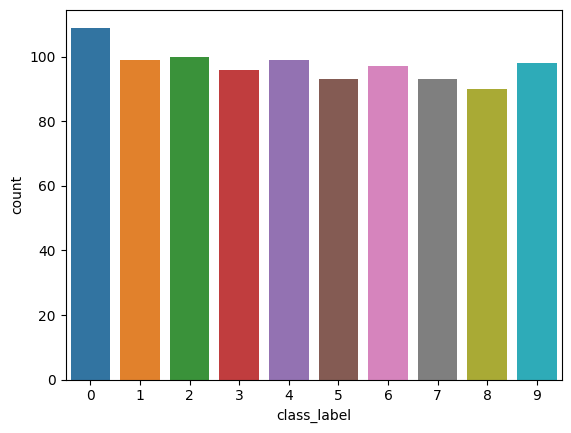

In [8]:
# distribution of sample points for each class
# train data
#6
sns.countplot(x = df_train['class_label'])

<Axes: xlabel='class_label', ylabel='count'>

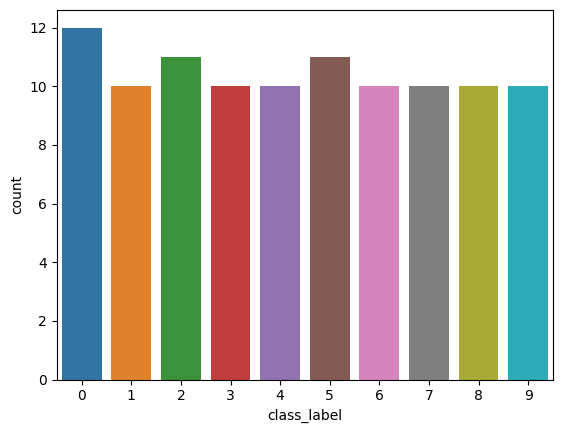

In [9]:
#test data class label distributions
#7
sns.countplot(x = df_test['class_label'])

In [10]:
#playing some sample audio
#8
i = 10
path = df_train['path'].iloc[i]
label = df_train['class_name'].iloc[i]
print('Label: ', label)
Audio(path)

Label:  peafowl


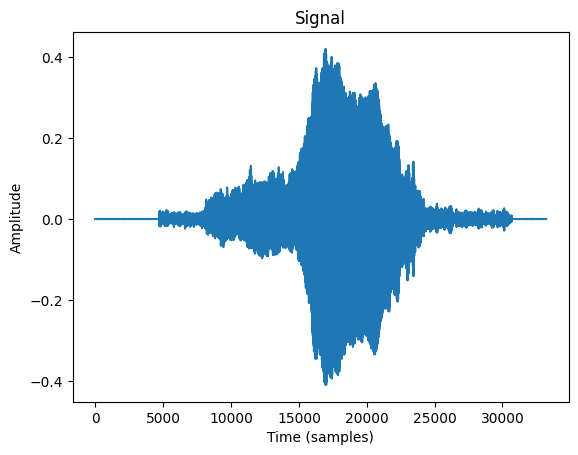

In [11]:
#displaying raw audio
#9

y, sr = librosa.load(path)
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

Shape:  (128, 65)


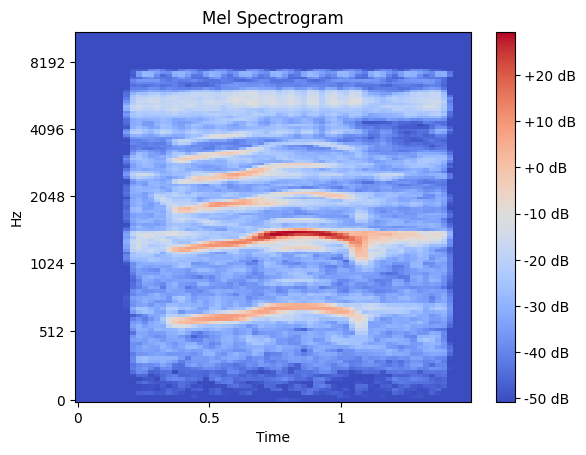

In [12]:
#10
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)  # finding spectograms
mel_spect = librosa.power_to_db(mel_spect) #converitng into mel scale by converting into log

#displaying dimensions of the spectrogram
print("Shape: ", mel_spect.shape)

# displaying spectogram
librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

Shape:  (65, 40)


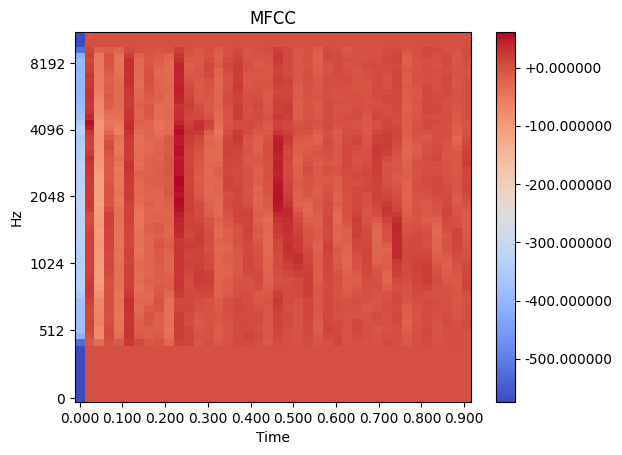

In [13]:
#11
# calculating mfcc's from mel spectrogram
mfccs = librosa.feature.mfcc(S=mel_spect, n_mfcc=40)

mfccs = mfccs.T
print("Shape: ", mfccs.shape)

#displaying mel-frequency spectrum which is nothing but spectrogram of spectrogram kind of second derivative
librosa.display.specshow(mfccs, sr = sr, x_axis = 'time', y_axis='mel' )
plt.colorbar(format="%+2f")
plt.title('MFCC')
plt.show()

In [14]:
#12
#train set
X_train = df_train['path']
y_train = df_train['class_label']

#test set
X_test = df_test['path']
y_test = df_test['class_label']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((974,), (974,), (104,), (104,))

In [15]:
#13
#getting mfcc features for all the data points in test and train

def get_mfcc(path):
    y, sr = librosa.load(path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    return mfccs.T

In [16]:
#14
# train data
temp = []
label = []
for i in tqdm(range(len(X_train))):
  audio_path = X_train.iloc[i]
  mfcc = get_mfcc(audio_path)
  mfcc = np.resize(mfcc, (66, 40))
  temp.append(mfcc)
  label.append(y_train.iloc[i])

X_train_processed = np.asarray(temp)
y_train = np.asarray(label)

X_train_processed.shape, y_train.shape

100%|██████████| 974/974 [09:40<00:00,  1.68it/s]


((974, 66, 40), (974,))

In [17]:
#15
X_train_processed[50]

array([[-6.63714539e+02, -4.61631238e-01,  3.40396255e-01, ...,
         3.75052810e-01, -3.85844707e-01,  3.30040753e-01],
       [-6.62464844e+02, -2.08807468e+00,  1.56846988e+00, ...,
        -1.27780885e-01,  4.99086231e-02,  2.82292217e-02],
       [-6.62445374e+02, -2.10755062e+00,  1.56637716e+00, ...,
        -4.26853299e-01,  5.64483285e-01, -6.19718671e-01],
       ...,
       [-6.63628967e+02, -5.82436919e-01,  4.59191978e-01, ...,
        -2.12471396e-01,  5.08858971e-02,  1.12644985e-01],
       [-6.63914673e+02, -2.04559058e-01,  1.56559899e-01, ...,
        -7.01288283e-02,  6.53739348e-02, -5.29827885e-02],
       [-6.63714539e+02, -4.61631238e-01,  3.40396255e-01, ...,
         3.75052810e-01, -3.85844707e-01,  3.30040753e-01]], dtype=float32)

In [18]:
#16
#test data
temp = []
label = []

for i in tqdm(range(len(X_test))):
  audio_path = X_test.iloc[i]
  mfcc = get_mfcc(audio_path)
  mfcc = np.resize(mfcc, (66, 40))
  temp.append(mfcc)
  label.append(y_test.iloc[i])

X_test_processed = np.asarray(temp)
y_test = np.asarray(label)

X_test_processed.shape, y_test.shape

100%|██████████| 104/104 [01:01<00:00,  1.68it/s]


((104, 66, 40), (104,))

In [19]:
#17
# Bi-directional GRU with attention

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, GRU, Dense, BatchNormalization, Bidirectional, Dropout, Layer
from tensorflow.keras.models import Model
import keras.backend as K

tf.keras.backend.clear_session()

In [20]:
#18

# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
                               initializer='zeros', trainable=True)
        super(attention, self).build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [21]:
#19
input = Input(shape=(66,40), name='input_layer')  #batch_size, time_steps, no_of_features

bt_norm = BatchNormalization(name='batch_norm_layer')(input)
bi_gru = Bidirectional(GRU(128, return_sequences = True, name = 'gru_layer'))(bt_norm)
att = attention(name="attention_layer")(bi_gru)
dense_1 = Dense(256,'relu', name='dense_layer_1')(att)
dense_2 = Dense(64,'relu', name='dense_layer_2')(dense_1)
dense_3 = Dense(64,'relu', name='dense_layer_3')(dense_2)
output = Dense(10, 'softmax', name='output_layer')(dense_3)

model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 66, 40)]          0         
                                                                 
 batch_norm_layer (BatchNor  (None, 66, 40)            160       
 malization)                                                     
                                                                 
 bidirectional (Bidirection  (None, 66, 256)           130560    
 al)                                                             
                                                                 
 attention_layer (attention  (None, 256)               322       
 )                                                               
                                                                 
 dense_layer_1 (Dense)       (None, 256)               65792     
                                                             

In [22]:
#20
#callbacks
from keras.callbacks import ModelCheckpoint

# model checkpoint
filepath="best_model_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=True, mode='max')

callbacks_list = [checkpoint]

In [23]:
#21
#compile
ls = tf.keras.losses.SparseCategoricalCrossentropy()
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(adam, ls, metrics='accuracy')

#fitting
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test),
                     callbacks = callbacks_list,
                    epochs = 20)

Epoch 1/20
31/31 [==============================] - 12s 166ms/step - loss: 1.5059 - accuracy: 0.6140 - val_loss: 0.4580 - val_accuracy: 0.8654
Epoch 2/20
31/31 [==============================] - 4s 129ms/step - loss: 0.2218 - accuracy: 0.9384 - val_loss: 0.1279 - val_accuracy: 0.9712
Epoch 3/20
31/31 [==============================] - 6s 208ms/step - loss: 0.0637 - accuracy: 0.9836 - val_loss: 0.0879 - val_accuracy: 0.9808
Epoch 4/20
31/31 [==============================] - 4s 126ms/step - loss: 0.0285 - accuracy: 0.9938 - val_loss: 0.1524 - val_accuracy: 0.9423
Epoch 5/20
31/31 [==============================] - 4s 126ms/step - loss: 0.0169 - accuracy: 0.9979 - val_loss: 0.0984 - val_accuracy: 0.9712
Epoch 6/20
31/31 [==============================] - 5s 179ms/step - loss: 0.0155 - accuracy: 0.9938 - val_loss: 0.0920 - val_accuracy: 0.9519
Epoch 7/20
31/31 [==============================] - 5s 146ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.1009 - val_accuracy: 0.9519
Epoch

In [24]:
#22
model.load_weights("best_model_weights.hdf5")

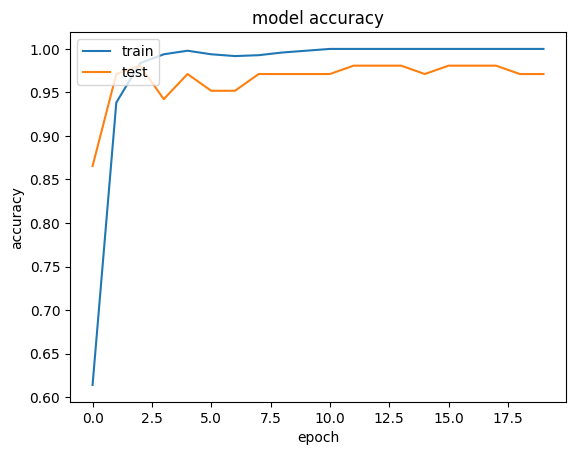

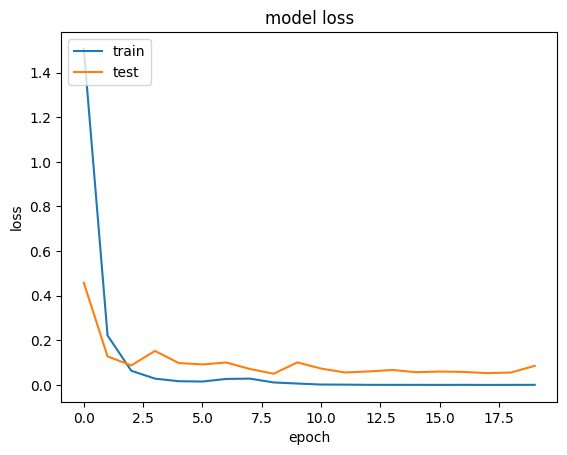

In [25]:
#23
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#24
path = '/content/drive/MyDrive/whole_dataset/model'

#saving the model
model.save(path)

#loading the model
model = tf.keras.models.load_model(path)

In [26]:
#25
# Prediction
cls_label = {'Asiankoel' : 0, 'bluejay': 1, 'crow': 2, 'duck': 3, 'goaway': 4, 'lapwing': 5, 'owl': 6,
             'peafowl' : 7, 'sparrow':8, 'woodpeewe':9}

def get_bird_name(label):
  for k, v in cls_label.items():
    if v == label:
      return k

def predict_test(i):
    x = X_test_processed[i]
    y = y_test[i]

    y_hat_prob = model.predict(x.reshape((1, 66, 40)))
    y_hat = np.argmax(y_hat_prob)

    print("Actual_label: ", get_bird_name(y))
    print('Predicted_label: ', get_bird_name(y_hat))

predict_test(55
            )

1/1 [==============================] - 1s 833ms/step
Actual_label:  owl
Predicted_label:  owl
